In [1]:
%matplotlib notebook
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import numpy

_cuda_ = torch.cuda.is_available()

print("Setting CUDA Availability to [%s]" % str(_cuda_))

import matplotlib.pyplot as plt
import torchvision


def imshow(npimg):
    #img = img / 2 + 0.5     # unnormalize
    #npimg = img.numpy()
    #print npimg.shape
    #plt.imshow(npimg.transpose(1,2,0))
    #plt.show()
    #plt.draw()
    #plt.pause(0.001)
    ax.clear()
    ax.imshow(npimg.transpose(1,2,0))
    fig.canvas.draw()


def show_results():
    tt = iter(DataLoader(dataset, batch_size=4, shuffle=False))
    #tt.next()
    imgin, _ = tt.next()
    img = imgin.view(imgin.size(0), -1)
    if _cuda_:
        img = Variable(img).cuda()
    else:
        img = Variable(img)
    # ===================forward=====================
    output = model(img)
    pic = to_img(output.cpu().data)
    im1 = torchvision.utils.make_grid(imgin).numpy()
    im2 = torchvision.utils.make_grid(pic).numpy()
    imout = numpy.concatenate((im1, im2), 1)
    imshow(imout)


if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 10
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = MNIST('./data', transform=img_transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


Setting CUDA Availability to [True]


In [ ]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


<IPython.core.display.Javascript object>


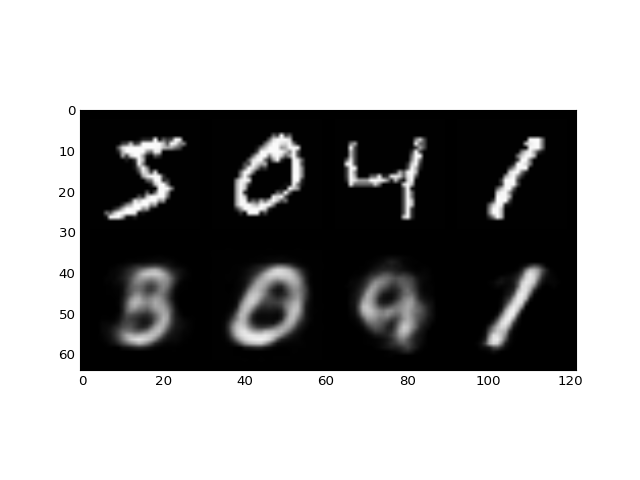

In [ ]:
if _cuda_:
  model = autoencoder().cuda()
else:
  model = autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for epoch in range(num_epochs):
    #if epoch % 10 == 0:
    for idx, data in enumerate(dataloader):
        img, _ = data
        img = img.view(img.size(0), -1)
        if _cuda_:
          img = Variable(img).cuda()
        else:
          img = Variable(img)
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if idx % 20 == 0:
            show_results()
    # ===================log========================
    #print('epoch [{}/{}], loss:{:.4f}'
    #      .format(epoch + 1, num_epochs, loss.data[0]))